In [23]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, TensorBoard

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import img_to_array
from tqdm import tqdm
import math

In [2]:
height = 64
width = 128
channel = 3

In [3]:
clean_data_path = 'D:\\intern\\classified_data\\clean_data\\extra_clean'
noisy_15dB_path = 'D:\\intern\\classified_data\\noisy_data\\15dB\\extra_15dB'
noisy_20dB_path = 'D:\\intern\\classified_data\\noisy_data\\20dB\\extra_20dB'
noisy_25dB_path = 'D:\\intern\\classified_data\\noisy_data\\25dB\\extra_25dB'
noisy_30dB_path = 'D:\\intern\\classified_data\\noisy_data\\30dB\\extra_30dB'
noisy_100dB_path = 'D:\\intern\\classified_data\\noisy_data\\100dB\\extra_100dB'

In [4]:
clean_data_files = os.listdir(clean_data_path)
noisy_15dB_files = os.listdir(noisy_15dB_path)
noisy_20dB_files = os.listdir(noisy_20dB_path)
noisy_25dB_files = os.listdir(noisy_25dB_path)
noisy_30dB_files = os.listdir(noisy_30dB_path)
noisy_100dB_files = os.listdir(noisy_100dB_path)

In [6]:
clean_data = np.zeros((len(clean_data_files), height, width, channel), dtype=np.float32)
noisy_15dB = np.zeros((len(noisy_15dB_files), height, width, channel), dtype=np.float32)
noisy_20dB = np.zeros((len(noisy_20dB_files), height, width, channel), dtype=np.float32)
noisy_25dB = np.zeros((len(noisy_25dB_files), height, width, channel), dtype=np.float32)
noisy_30dB = np.zeros((len(noisy_30dB_files), height, width, channel), dtype=np.float32)
noisy_100dB = np.zeros((len(noisy_100dB_files), height, width, channel), dtype=np.float32)

In [7]:
n=0
for i in tqdm(clean_data_files):
    img = cv2.imread(clean_data_path + '\\' + i)[:,:,:channel]
    img = cv2.resize(img, (width, height)) / 255.
    clean_data[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 588.54it/s]


In [13]:
n=0
for i in tqdm(noisy_15dB_files):
    img = cv2.imread(noisy_15dB_path + '\\' + i)[:,:,:channel]
    img = cv2.resize(img, (width, height)) / 255.
    noisy_15dB[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 106.46it/s]


In [14]:
n=0
for i in tqdm(noisy_20dB_files):
    img = cv2.imread(noisy_20dB_path + '\\' + i)[:,:,:channel]
    img = cv2.resize(img, (width, height)) / 255.
    noisy_20dB[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 130.48it/s]


In [15]:
n=0
for i in tqdm(noisy_25dB_files):
    img = cv2.imread(noisy_25dB_path + '\\' + i)[:,:,:channel]
    img = cv2.resize(img, (width, height)) / 255.
    noisy_25dB[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 129.20it/s]


In [16]:
n=0
for i in tqdm(noisy_30dB_files):
    img = cv2.imread(noisy_30dB_path + '\\' + i)[:,:,:channel]
    img = cv2.resize(img, (width, height)) / 255.
    noisy_30dB[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 132.80it/s]


In [17]:
n=0
for i in tqdm(noisy_100dB_files):
    img = cv2.imread(noisy_100dB_path + '\\' + i)[:,:,:channel]
    img = cv2.resize(img, (width, height)) / 255.
    noisy_100dB[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 190.95it/s]


In [43]:
model = Sequential([
    
  # encoder
    Conv2D(64, (3,3), padding="same", activation="relu", input_shape=(height,width,channel)),
    BatchNormalization(),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    
    # decoder
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    
    Conv2D(3, (3,3), padding="same", activation="sigmoid") # sigmoid, relu    
])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 64, 128, 64)       1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 128, 64)       256       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 64, 128, 64)       36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 128, 64)       256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 64, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 64, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 64, 32)       

In [45]:
early_stop = EarlyStopping(
                monitor='val_loss',
                patience=10, #n of epochs with no improvement which will be stopped training
                verbose=1
            )

log_csv = CSVLogger('logs.csv',
                   separator=',',
                   append=False
                   )

tensorboard = TensorBoard(
                log_dir='logs'
            )

# callbacks_list = [early_stop, log_csv, tensorboard]

In [46]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(noisy_15dB, clean_data,
          validation_split=0.2,
          batch_size=16,
          epochs=20,
          #callbacks=callbacks_list
        )

Train on 400 samples, validate on 100 samples
Epoch 1/20
400/400 [==============================] - 59s 148ms/sample - loss: 1.5568 - accuracy: 0.3268 - val_loss: 1.7115 - val_accuracy: 0.9838
Epoch 2/20
400/400 [==============================] - 60s 150ms/sample - loss: 1.5568 - accuracy: 0.3133 - val_loss: 1.7115 - val_accuracy: 0.6228
Epoch 3/20
400/400 [==============================] - 61s 152ms/sample - loss: 1.5568 - accuracy: 0.3488 - val_loss: 1.7115 - val_accuracy: 0.3810
Epoch 4/20
400/400 [==============================] - 62s 154ms/sample - loss: 1.5568 - accuracy: 0.3311 - val_loss: 1.7115 - val_accuracy: 0.7356
Epoch 5/20
400/400 [==============================] - 60s 151ms/sample - loss: 1.5568 - accuracy: 0.3328 - val_loss: 1.7115 - val_accuracy: 0.8658
Epoch 6/20
400/400 [==============================] - 57s 144ms/sample - loss: 1.5568 - accuracy: 0.3427 - val_loss: 1.7115 - val_accuracy: 0.9067
Epoch 7/20
400/400 [==============================] - 58s 144ms/sample -

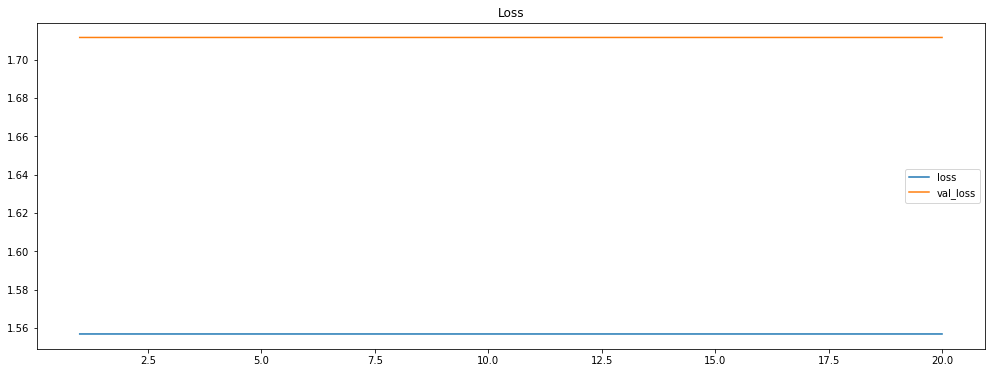

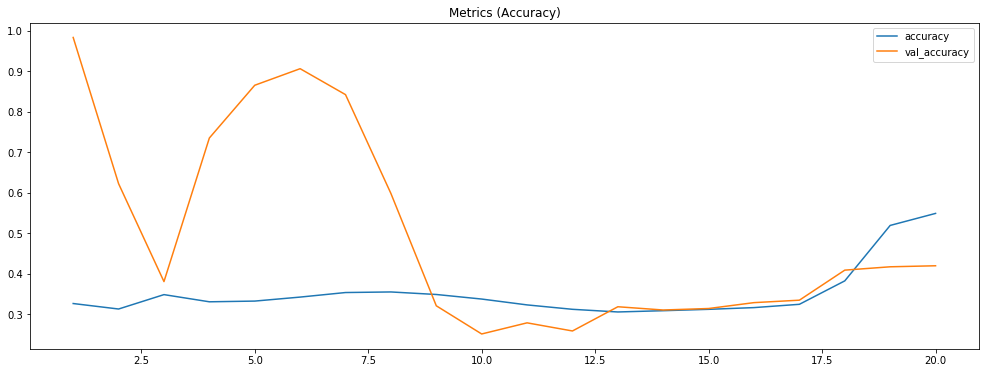

In [48]:
plt.rcParams['figure.figsize'] = (17,6)
fig, ax1 = plt.subplots()
xepochs = range(1,len(history.history['loss']) + 1)

plt.plot(xepochs, history.history['loss'], label = 'loss')
plt.plot(xepochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(xepochs, history.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [49]:
decoded_20dB = model.predict(noisy_20dB)
decoded_25dB = model.predict(noisy_25dB)
decoded_30dB = model.predict(noisy_30dB)
decoded_100dB = model.predict(noisy_100dB)

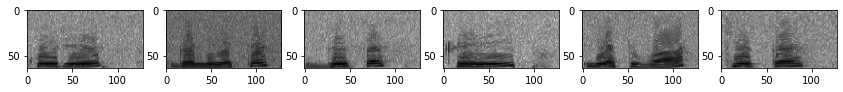

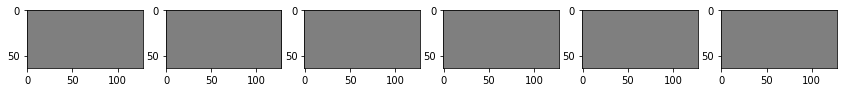

In [50]:
# Displaying prediction images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(noisy_20dB[i])
plt.show()

# Displaying prediction_train images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(decoded_20dB[i])
plt.show()

In [51]:
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse)) 
    return psnr

In [52]:
print(f'20dB PSNR mean: {PSNR(noisy_20dB, decoded_20dB)}')

for i in range(len(noisy_20dB)):
    
    value = PSNR(noisy_20dB[i], decoded_20dB[i]) 
    print(f"PSNR value is {value} dB")

20dB PSNR mean: 66.47231105361557
PSNR value is 66.93473298009974 dB
PSNR value is 66.52364780080308 dB
PSNR value is 63.98510819813762 dB
PSNR value is 67.21640768251562 dB
PSNR value is 66.0769858297755 dB
PSNR value is 65.34047865504238 dB
PSNR value is 66.6823785029413 dB
PSNR value is 67.41060120197196 dB
PSNR value is 65.47925938873026 dB
PSNR value is 65.06845084077473 dB
PSNR value is 66.98535287859127 dB
PSNR value is 65.05611441648492 dB
PSNR value is 65.28383371291388 dB
PSNR value is 65.65087312226922 dB
PSNR value is 67.33856879872017 dB
PSNR value is 66.5928082378486 dB
PSNR value is 66.98524662095234 dB
PSNR value is 66.77124143003893 dB
PSNR value is 65.93316945331108 dB
PSNR value is 66.42703441828131 dB
PSNR value is 66.14955214685845 dB
PSNR value is 65.51430046689207 dB
PSNR value is 65.44391484994361 dB
PSNR value is 65.66607181039797 dB
PSNR value is 67.05621851741796 dB
PSNR value is 65.91597025658137 dB
PSNR value is 66.98145784328648 dB
PSNR value is 67.5275123

PSNR value is 66.84399834480354 dB
PSNR value is 65.43408266384549 dB
PSNR value is 66.33735357279932 dB
PSNR value is 65.64346133782173 dB
PSNR value is 66.05800094439876 dB
PSNR value is 67.6814888139438 dB
PSNR value is 66.21093897901255 dB
PSNR value is 66.49385614283634 dB
PSNR value is 66.64904844981567 dB
PSNR value is 64.52380737874284 dB
PSNR value is 66.1461241217353 dB
PSNR value is 66.77035308080201 dB
PSNR value is 65.45364007652738 dB
PSNR value is 67.11159555692458 dB
PSNR value is 68.09682453061413 dB
PSNR value is 66.22919806631838 dB
PSNR value is 66.23304895703737 dB
PSNR value is 67.29333190268937 dB
PSNR value is 68.13671012568463 dB
PSNR value is 65.24196160136216 dB
PSNR value is 65.66735334912387 dB
PSNR value is 66.08680656769864 dB
PSNR value is 66.47992511280513 dB
PSNR value is 65.07817599928077 dB
PSNR value is 65.78113296980648 dB
PSNR value is 66.73724237553327 dB
PSNR value is 66.53499497118217 dB
PSNR value is 65.80522413349658 dB
PSNR value is 67.13635

In [53]:
print(f'25dB PSNR mean: {PSNR(noisy_25dB, decoded_25dB)}')

for i in range(len(noisy_25dB)):
    
    value = PSNR(noisy_25dB[i], decoded_25dB[i]) 
    print(f"PSNR value is {value} dB")

25dB PSNR mean: 65.74880997282575
PSNR value is 65.42381941909186 dB
PSNR value is 65.88300885864506 dB
PSNR value is 65.58364194734976 dB
PSNR value is 66.53725311460315 dB
PSNR value is 65.31252608806702 dB
PSNR value is 64.78175064703134 dB
PSNR value is 65.88030368754767 dB
PSNR value is 66.67187805027957 dB
PSNR value is 64.5263887766797 dB
PSNR value is 64.60621904042492 dB
PSNR value is 66.26772506723502 dB
PSNR value is 64.4480206065809 dB
PSNR value is 64.21587296035828 dB
PSNR value is 65.15187530490616 dB
PSNR value is 65.79451262441475 dB
PSNR value is 65.98292547955126 dB
PSNR value is 66.16381900917514 dB
PSNR value is 65.84280777187462 dB
PSNR value is 62.87529709084585 dB
PSNR value is 65.87236322120825 dB
PSNR value is 65.58149784704034 dB
PSNR value is 64.41773994333059 dB
PSNR value is 64.71162789172534 dB
PSNR value is 65.29370032964242 dB
PSNR value is 65.86125814253181 dB
PSNR value is 65.10181753090048 dB
PSNR value is 66.26168110291067 dB
PSNR value is 66.056638

PSNR value is 65.28783029836461 dB
PSNR value is 65.94945786264881 dB
PSNR value is 65.48296645578817 dB
PSNR value is 63.76141144933277 dB
PSNR value is 65.16123890097005 dB
PSNR value is 66.1454767388815 dB
PSNR value is 64.9550561709352 dB
PSNR value is 66.45668050102068 dB
PSNR value is 65.95093013074762 dB
PSNR value is 64.97839173312508 dB
PSNR value is 66.03271421077697 dB
PSNR value is 66.63386206806867 dB
PSNR value is 66.5106121930107 dB
PSNR value is 64.3883174766509 dB
PSNR value is 65.22042822592053 dB
PSNR value is 65.59630317077244 dB
PSNR value is 66.67035958093616 dB
PSNR value is 64.33277314505767 dB
PSNR value is 64.57989124789381 dB
PSNR value is 65.84888254322712 dB
PSNR value is 65.75739154960591 dB
PSNR value is 65.91604263698312 dB
PSNR value is 66.76431097835174 dB
PSNR value is 65.00534452725874 dB
PSNR value is 65.75717189764173 dB
PSNR value is 66.76781087489594 dB
PSNR value is 65.46790957250971 dB
PSNR value is 65.69598731260841 dB
PSNR value is 66.0691125

In [54]:
print(f'30dB PSNR mean: {PSNR(noisy_30dB, decoded_30dB)}')

for i in range(len(noisy_30dB)):
    
    value = PSNR(noisy_30dB[i], decoded_30dB[i]) 
    print(f"PSNR value is {value} dB")

30dB PSNR mean: 65.03408424380252
PSNR value is 65.36479956919057 dB
PSNR value is 65.12318903497867 dB
PSNR value is 65.14112834974993 dB
PSNR value is 65.99388255474183 dB
PSNR value is 65.02767757685375 dB
PSNR value is 64.21813369230898 dB
PSNR value is 65.25399516752016 dB
PSNR value is 66.31307792839151 dB
PSNR value is 64.33991582147047 dB
PSNR value is 63.95654989833287 dB
PSNR value is 65.62143548229162 dB
PSNR value is 63.91071421610526 dB
PSNR value is 63.21308815058393 dB
PSNR value is 64.45337581194909 dB
PSNR value is 65.77831495560558 dB
PSNR value is 65.55818185947152 dB
PSNR value is 65.47146049505746 dB
PSNR value is 65.62059581474335 dB
PSNR value is 64.48552939325394 dB
PSNR value is 64.81683313305409 dB
PSNR value is 64.95319820295182 dB
PSNR value is 64.05629900008613 dB
PSNR value is 63.9408273528576 dB
PSNR value is 64.25121510743018 dB
PSNR value is 64.97810872598257 dB
PSNR value is 64.67327552513063 dB
PSNR value is 65.22735675966223 dB
PSNR value is 66.46459

PSNR value is 64.78695475867207 dB
PSNR value is 64.33774753354095 dB
PSNR value is 64.47707216851786 dB
PSNR value is 63.97193524819883 dB
PSNR value is 65.3244136693082 dB
PSNR value is 66.0242876977805 dB
PSNR value is 66.07112990578 dB
PSNR value is 65.70025900787786 dB
PSNR value is 65.45671651275784 dB
PSNR value is 63.7154838067654 dB
PSNR value is 66.09992420775144 dB
PSNR value is 65.7539991896209 dB
PSNR value is 64.97895467075733 dB
PSNR value is 65.88714143638805 dB
PSNR value is 64.20564441649616 dB
PSNR value is 64.58344361832764 dB
PSNR value is 65.61026984194967 dB
PSNR value is 64.80917990604797 dB
PSNR value is 64.88313589902016 dB
PSNR value is 65.93681066988813 dB
PSNR value is 64.5945804278579 dB
PSNR value is 65.25775981776813 dB
PSNR value is 65.10195929477715 dB
PSNR value is 64.65913719354049 dB
PSNR value is 64.80580938056863 dB
PSNR value is 64.07435350143506 dB
PSNR value is 64.38773352258247 dB
PSNR value is 63.847388072678484 dB
PSNR value is 64.7962787443

In [55]:
print(f'100dB PSNR mean: {PSNR(noisy_100dB, decoded_100dB)}')

for i in range(len(noisy_100dB)):
    
    value = PSNR(noisy_100dB[i], decoded_100dB[i]) 
    print(f"PSNR value is {value} dB")

100dB PSNR mean: 59.42776304989912
PSNR value is 62.032638017272184 dB
PSNR value is 63.177356295731634 dB
PSNR value is 61.87868070218137 dB
PSNR value is 62.892742805153375 dB
PSNR value is 61.90978816124779 dB
PSNR value is 61.66171578701973 dB
PSNR value is 62.41169559157089 dB
PSNR value is 54.15365514934841 dB
PSNR value is 61.75236997627984 dB
PSNR value is 61.82549513848383 dB
PSNR value is 62.33038123290673 dB
PSNR value is 60.907276984636226 dB
PSNR value is 61.6768972374279 dB
PSNR value is 62.052432071377446 dB
PSNR value is 54.15365514934841 dB
PSNR value is 61.54591198888801 dB
PSNR value is 54.15365514934841 dB
PSNR value is 62.890164531299995 dB
PSNR value is 61.21053587160625 dB
PSNR value is 62.250940328492646 dB
PSNR value is 62.61075833598332 dB
PSNR value is 61.42234247377956 dB
PSNR value is 61.13951503985235 dB
PSNR value is 54.15365514934841 dB
PSNR value is 62.949905130718555 dB
PSNR value is 62.03476890821473 dB
PSNR value is 61.95216796393027 dB
PSNR value is

PSNR value is 62.20692600083326 dB
PSNR value is 61.87077881281433 dB
PSNR value is 61.63340074640037 dB
PSNR value is 62.54168911187854 dB
PSNR value is 62.794834205226095 dB
PSNR value is 62.38071988286098 dB
PSNR value is 54.15365514934841 dB
PSNR value is 62.11835864821305 dB
PSNR value is 54.15365514934841 dB
PSNR value is 62.29120584960148 dB
PSNR value is 61.844735439031965 dB
PSNR value is 61.63161043127192 dB
PSNR value is 62.4410034500647 dB
PSNR value is 63.39235393842283 dB
PSNR value is 63.06961074529151 dB
PSNR value is 62.596604520397946 dB
PSNR value is 54.15365514934841 dB
PSNR value is 54.15365514934841 dB
PSNR value is 62.49652000540695 dB
PSNR value is 54.15365514934841 dB
PSNR value is 63.03701472538098 dB
PSNR value is 62.58700882477147 dB
PSNR value is 62.05779640958787 dB
PSNR value is 63.221162787685415 dB
PSNR value is 62.64313818058433 dB
PSNR value is 62.066318601133766 dB
PSNR value is 54.15365514934841 dB
PSNR value is 54.15365514934841 dB
PSNR value is 62